In [1]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal

In [2]:
xl =pd.ExcelFile('Topo_Profiles_Barrow.xlsx')

In [3]:
xl.sheet_names

data = xl.parse(sheet_name='Transect B, Area C')
keys = data.keys()


In [4]:
import math
def Distance(x,y):
    d = np.zeros(len(x))
    for i in range(len(x)):
        d[i] = math.hypot(x[-1] - x[i], y[-1] - y[i])
    return d

In [17]:
# smooth the topographic data : February 13 and trough cell inward oriented
length = len(data['Distance_m'])
x = []
z = []


x = np.array(data['Distance_m'][:46])
z = np.array(data['Z'][:46])

z = [z1 - 0.1127955 for z1 in z] # match the trough's elevation with the "trough elevation" from water-table data 

# water level pie-wedge
rim = 4.9
x1_N3 = [x[0], x[10]]
z1_N3 = [4.71, rim]
x2_N3 = [x[10], x[20], x[-1]]
z2_N3 = [rim, rim-0.02, 4.78]
cs1 = scipy.interpolate.CubicSpline(x1_N3,z1_N3, bc_type='clamped')
cs2 = scipy.interpolate.CubicSpline(x2_N3,z2_N3, bc_type='clamped')

z_smooth_N3 = np.concatenate((cs1(x[:11]), cs2(x[11:])))
z_smooth_N3 = np.array([round(s,4) for s in z_smooth_N3])

z_left = z_smooth_N3
xx = x1_N3 + x2_N3
zz = z1_N3 + z2_N3

# Temperature pie-wedge
site_area = 'C'
if site_area == 'C': 
    print (site_area)
    zv = np.array([5.099, 5.169, 5.321, 4.968])
    zv =zv[::-1]
    northing = [7910344.103,7910341.163,7910337.608, 7910335.845] #original
    easting = [585907.153,585907.605,585908.893,585909.606]
    distC = Distance(northing,easting)
    distC = distC[::-1]
    #print distC, zv
    numx1 = int((distC[1] - distC[0]) / 0.22)
    numx2 = int((distC[-1] - distC[1]) / 0.24)

    #print numx1, numx2
    xnew1 = np.linspace(distC[0],distC[1],numx1)
    xnew2 = np.linspace(distC[1],distC[-1],numx2)
    cs1 = scipy.interpolate.CubicSpline(distC[:2],zv[:2], bc_type='clamped')
    cs2 = scipy.interpolate.CubicSpline(distC[1:],zv[1:], bc_type='clamped')

    x_vladimir = np.concatenate((xnew1,xnew2[1:]))
    z_smooth_vladimir = np.concatenate((cs1(xnew1), cs2(xnew2[1:])))
    print (x_vladimir)
    

z_right = z_smooth_vladimir



C
[0.         0.27167425 0.5433485  0.81502275 1.086697   1.35837125
 1.6300455  1.90171975 2.15990843 2.41809712 2.6762858  2.93447448
 3.19266317 3.45085185 3.70904054 3.96722922 4.2254179  4.48360659
 4.74179527 4.99998395 5.25817264 5.51636132 5.77455001 6.03273869
 6.29092737 6.54911606 6.80730474 7.06549343 7.32368211 7.58187079
 7.84005948 8.09824816 8.35643685 8.61462553]


In [18]:
d = z_right[-1] - z_left[-1]
X = []
for i in x_vladimir[1:]:
    X.append(x[-1] + i)
    

X = np.array(X)
X = np.concatenate((x,X))
Z = np.concatenate((z_left[:-1] ,z_right[::-1]-d))
Z1 = np.concatenate((z_left[:-1] +d,z_right[::-1]))
print (X)
#12.6564942  12.92816845 13.1998427  13.47151695 13.7431912

[ 0.          0.27521822  0.55043644  0.82565466  1.10087288  1.37609111
  1.65130933  1.92652755  2.20174577  2.47696399  2.75218221  3.02740043
  3.30261865  3.57783688  3.8530551   4.12827332  4.40349154  4.67870976
  4.95392798  5.2291462   5.50436442  5.77958265  6.05480087  6.33001909
  6.60523731  6.88045553  7.15567375  7.43089197  7.70611019  7.98132841
  8.25654664  8.53176486  8.80698308  9.0822013   9.35741952  9.63263774
  9.90785596 10.18307418 10.45829241 10.73351063 11.00872885 11.28394707
 11.55916529 11.83438351 12.10960173 12.38481995 12.6564942  12.92816845
 13.1998427  13.47151695 13.7431912  14.01486545 14.2865397  14.54472839
 14.80291707 15.06110575 15.31929444 15.57748312 15.83567181 16.09386049
 16.35204917 16.61023786 16.86842654 17.12661522 17.38480391 17.64299259
 17.90118128 18.15936996 18.41755864 18.67574733 18.93393601 19.1921247
 19.45031338 19.70850206 19.96669075 20.22487943 20.48306812 20.7412568
 20.99944548]


[4.71       4.7153     4.7298     4.751      4.7769     4.805
 4.8331     4.859      4.8802     4.8947     4.9        4.8998
 4.8992     4.8981     4.8967     4.8948     4.8926     4.89
 4.887      4.8837     4.88       4.876      4.8717     4.8671
 4.8623     4.8573     4.8521     4.8469     4.8416     4.8362
 4.8309     4.8257     4.8205     4.8154     4.8106     4.8059
 4.8016     4.7975     4.7937     4.7903     4.7873     4.7848
 4.7828     4.7812     4.7803     4.78       4.78056802 4.78226227
 4.78506799 4.78897044 4.7939549  4.80000661 4.80711083 4.81525283
 4.82441786 4.83459118 4.84575806 4.85789361 4.87084373 4.88436517
 4.89821292 4.91214196 4.92590728 4.93926386 4.95196668 4.96377073
 4.974431   4.98370246 4.99134011 4.99709893 5.0007339  5.002
 4.98244606 4.93201749 4.86306414 4.78793586 4.71898251 4.66855394
 4.649     ]


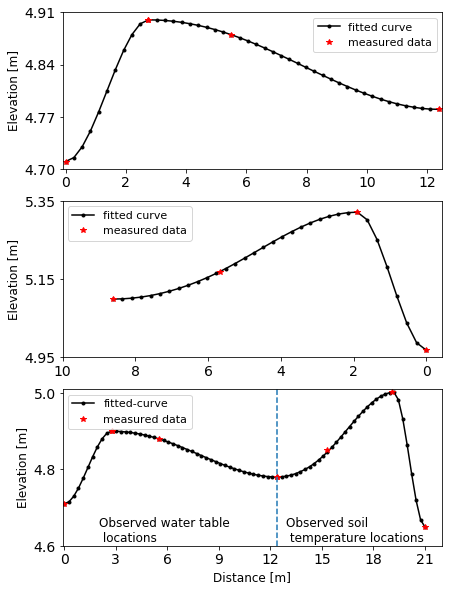

In [33]:
fig, axs = plt.subplots(3,1, figsize=(6,8), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
axs = axs.ravel()

axs[0].plot(x, z_smooth_N3, '.-', color = 'k',label = 'fitted curve')
axs[0].plot(x1_N3,z1_N3,'*', color='r')
axs[0].plot(x2_N3,z2_N3,'*', color='r',label='measured data')

axs[0].set_ylabel('Elevation [m]', fontsize=12,fontweight='normal')
#axs[0].set_xlabel('Distance [m]',fontsize=12,fontweight='normal')
axs[0].tick_params(axis='both', which='major', labelsize=14)

axs[0].set_xlim(-0.1,12.5)
axs[0].set_ylim(4.7,4.91)
axs[0].set_yticks(np.linspace(4.7,4.91,4))
axs[0].set_xticks(np.linspace(0.0,12,7))
axs[0].legend(loc='upper right', fontsize=11)
#plt.legend(fontsize=12)
#plt.savefig('/Users/ajc/Core/PostProcessData/2019/simulations/barrow-iwp/Meshes/microtopography-N3-jan22.pdf', bbox_inches='tight', dpi=100)
#plt.show()



axs[1].plot(x_vladimir, z_smooth_vladimir, '.-', color= 'k',label = 'fitted curve')
axs[1].plot(distC, zv, '*', color= 'r', label='measured data')
axs[1].invert_xaxis()
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].legend(loc='upper left', fontsize=11)
axs[1].set_ylabel('Elevation [m]', fontsize=12,fontweight='normal')
axs[1].set_ylim(4.95,5.35)
axs[1].set_yticks(np.linspace(4.95,5.35,3))
axs[1].set_xticks(np.linspace(10,0,6))


# Combine both water-level and temperature topography
assert len(Z) == len(X)
axs[2].plot(X,Z, '.-',color='k',label='fitted-curve')
print (Z)
#plt.plot(X,Z1, '*-',color='c')

#plt.plot(X[int(79/2)], Z1[int(79/2)],'^', color='g')

# 2D plot for paper
axs[2].plot(xx,zz , '*', color = 'r')
distC_temp = [X[-1] - i for i in distC]
zv_temp = [i -d for i in zv]
axs[2].plot(distC_temp, zv_temp, '*', color= 'r', label='measured data')
axs[2].axvline(x=distC_temp[-1],linestyle='--')
axs[2].tick_params(axis='both', which='major', labelsize=14)
axs[2].legend(loc='upper left', fontsize=11)
axs[2].set_ylabel('Elevation [m]', fontsize=12,fontweight='normal')
axs[2].set_xlabel('Distance [m]',fontsize=12,fontweight='normal')
axs[2].set_xlim(-0.1,22)
axs[2].set_ylim(4.6,5.01)
axs[2].set_yticks(np.linspace(4.6,5.0,3))
axs[2].set_xticks(np.linspace(0.0,21,8))
axs[2].text(2,4.61,'Observed water table\n locations',fontsize=12,fontweight='normal')
axs[2].text(12.9,4.61,'Observed soil \n temperature locations',fontsize=12,fontweight='normal')

plt.savefig('/Users/ajc/Core/PostProcessData/2019/simulations/barrow-iwp/Meshes/microtopography-3D-C-jan28.pdf', bbox_inches='tight', dpi=100)



In [ ]:
outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001)
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(4):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(15): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(35):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003)

m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)

m3.write_exodus(outfile + "areaC-3layers-diver-om10cm-N7.exo")


In [ ]:
#variable peat thickness

outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(9):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(-1000*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(10): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(35):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003*np.ones((m2.num_cells(),),'i'))


mat_ids=np.zeros((m2.num_cells(), 11), 'i')

for i in range(m2.num_cells()):
    for j in range(11):
        if (Z[j]<=peat_thickness[i]):
            mat_ids[i,j]=1002
        else:
            mat_ids[i,j]=1003
for j in range(11):
    layer_mat_ids[j] = mat_ids[:,j]

print len(layer_mat_ids), len(layer_ncells), len(layer_types), len(layer_data)


m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)


m3.write_exodus(outfile + "areaC-3layers-diver-om10cm.exo")




